In [2]:
from scipy.stats import kstest
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline
sns.set_theme(style="whitegrid")

Populating the interactive namespace from numpy and matplotlib


## Afin d'introduire votre analyse, effectuez une brève description des données (analyses univariées et bivariées).

In [3]:
fakeTickets = pd.read_csv("../../lab/origin_values/faux_billets.csv", parse_dates=True) 
fakeTickets

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55
...,...,...,...,...,...,...,...
165,False,172.11,104.23,104.45,5.24,3.58,111.78
166,False,173.01,104.59,104.31,5.04,3.05,110.91
167,False,172.47,104.27,104.10,4.88,3.33,110.68
168,False,171.82,103.97,103.88,4.73,3.55,111.87


In [4]:
groupFakeTickets = fakeTickets.groupby(['is_genuine']).mean()
groupFakeTickets = groupFakeTickets.reset_index()
groupFakeTickets

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,False,171.889857,104.230429,104.145571,5.281571,3.334571,111.660714
1,True,171.976100,103.951500,103.775900,4.143500,3.055500,113.207200


In [5]:
genuineTrue = fakeTickets.loc[fakeTickets.is_genuine == True]
genuineTrue

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55
...,...,...,...,...,...,...,...
95,True,172.49,103.92,103.91,4.42,2.84,113.38
96,True,172.00,104.32,104.26,4.53,3.04,112.93
97,True,171.49,103.77,103.60,4.01,3.09,112.95
98,True,172.10,103.98,103.86,4.47,3.06,113.00


In [6]:
genuineTrue["diagonal"].describe()

count    100.000000
mean     171.976100
std        0.307981
min      171.040000
25%      171.790000
50%      172.005000
75%      172.162500
max      172.750000
Name: diagonal, dtype: float64

<AxesSubplot:xlabel='diagonal'>

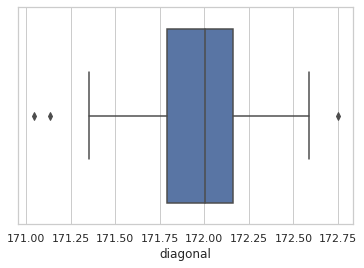

In [7]:
sns.boxplot(x=genuineTrue["diagonal"])

Text(0.5, 0, 'mm')

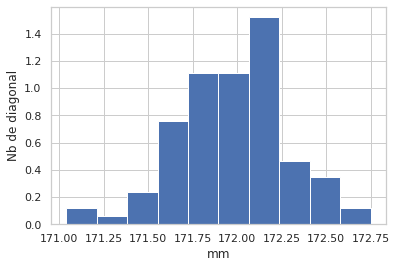

In [9]:
genuineTrue["diagonal"].hist(density=True)
plt.ylabel('Nb de diagonal')
plt.xlabel('mm')

[]

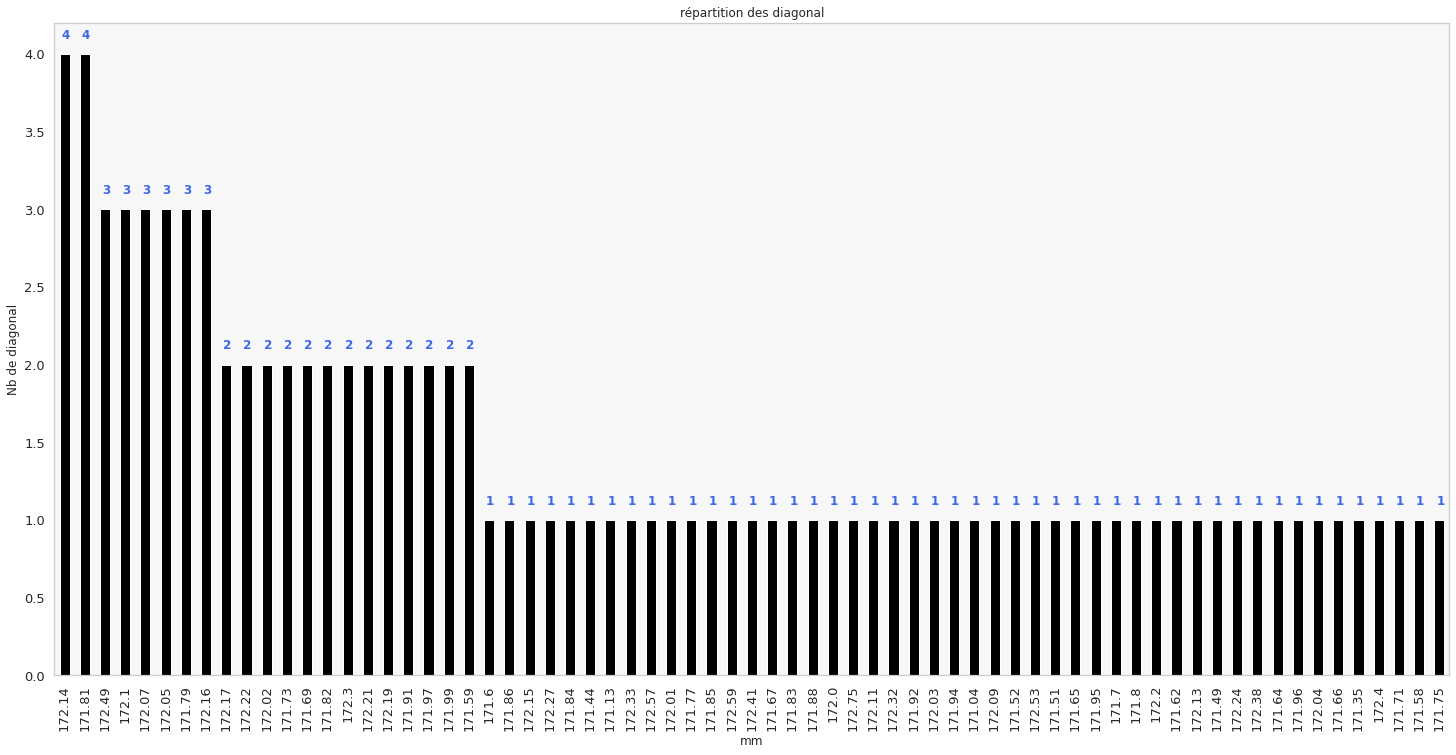

In [13]:

ax = genuineTrue['diagonal'].value_counts().plot(kind='bar', figsize=(25,12),
                                                  color="black", fontsize=13,grid=False);
ax.set_alpha(0.8)
ax.set_facecolor('#F7F7F7')


# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.1, i.get_height()+.1, \
            str(int(round((i.get_height()/total)*100, 0))), fontsize=12,fontweight="bold",
                color='royalblue')

plt.title('répartition des diagonal')
plt.ylabel('Nb de diagonal')
plt.xlabel('mm')    
    
ax.plot()    

In [ ]:
genuineFalse = fakeTickets.loc[fakeTickets.is_genuine == False]
genuineFalse